# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">

# Implementación de Gradiente Descendente para Regresión Logística

En el curso aprendimos que utilizando el Método del Gradiente Descendente, es posible encontrar aquellos coeficientes que minimizan una función de pérdida. En la clase se demostró el uso de este método para obtener los coeficientes de una Regresión Lineal.

En esta tarea se buscará obtener los coeficientes en una regresión logística, la cual no puede resolverse de manera analítica. 


Para comenzar, generamos datos simulados utilizando [Sci-Kit Learn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html). La visualización de estos datos se presenta más abajo.

**Presentado por:**</p></p>

**Juan Sebastián Quiroga Bernal**</p>

<table class="tfo-notebook-buttons" align="center">

  <td>
    <a target="_blank" href="https://colab.research.google.com/github/juancop/metodos_analitica_2/blob/main/01_optimization/02_tarea_gradiente_logistic.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/juancop/metodos_analitica_2/blob/dev/01_optimization/02_tarea_gradiente_logistic.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
  
</table>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                  random_state=0)


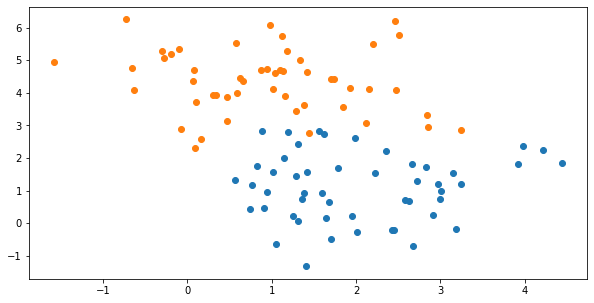

In [3]:
plt.figure(figsize = (10, 5))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1])
plt.show()

In [4]:
y = y.reshape(-1, 1)

In [5]:
X = np.hstack([np.ones((X.shape[0], 1)), X]) # Añadimos Intercepto

En clase se vio que la función a maximizar es la Función de Verosimilitud, que corresponde a:

$$\ell(\beta) = \sum_{i = 1}^N \Big[ y_i ln(\Lambda(x_i'\beta)) + (1 - y_i) ln(1 - \Lambda(x_i'\beta)) \Big].$$

Teniendo en cuenta que, 

$$\frac{\delta \ell(\beta)}{\delta \beta_j } = \sum_{i = 1}^N (y_i - \Lambda(x_i'\beta))x_j, $$

genere el código que permita implementar la regla de actualización del gradiente para maximizar la verosimilitud. 

**Nota:** Recuerde que $-\ell(\beta)$ es conocida como la *Binary Crossentropy* y el resultado de su minimización coincide con la maximización de la Verosimilitud.

# Paso 1. Construcción Función de Activación

Para poder realizar la optimización es necesario tener a la mano todos los elementos que la componen. Este caso necesitamos programar la función que nos genera la probabilidad -- la función sigmoide. 

Esta función viene dada por, 

$$\Lambda(z) = \frac{1}{1 + exp(-z)}.$$

In [6]:
def sigmoid_function(z):
  """
  Calcula la función sigmoide para z (de valor real)
  """

  ### 

  probability = 1/(1+np.exp(-z))

  ###

  return np.round(probability, 4)

Esta función debería retornar los siguientes valores... 

- $\Lambda(0) = 0.5$
- $\Lambda(-99) = 0$
- $\Lambda(2) = 0.8808$ 

In [7]:
assert sigmoid_function(0) == 0.5, f'La función arroja el valor de {sigmoid_function(0)} cuando debería ser 0.5'

In [8]:
assert sigmoid_function(-99) == 0, f'La función arroja el valor de {sigmoid_function(-99)} cuando debería ser 0'

In [9]:
assert sigmoid_function(2) == 0.8808, f'La función arroja el valor de {sigmoid_function(2)} cuando debería ser 0.8808'

Adicionalmente, con ilustrativos, es necesario programar la función de verosimilitud (o binary crossentropy) para darle seguimiento a la evolución del modelo. 

In [10]:
def log_likelihood(y, X, beta):
  """
  Retorna el valor de la función de Logaritmo de Verosimilitud para unos coeficientes estimados. 
  """

  ###
  # 1. Calcular Predicciones dado el vector de coeficientes Λ(XB)
  XB = np.dot(X,beta)
  LambdaXB = sigmoid_function(XB) # Dim: N x 1

  # 2. Cálculo de Componentes de Función y*ln(Λ(XB)) + (1-y) * ln(1 - Λ(XB))
  
  log_density = ((y*np.log(LambdaXB + 1e-8)) + ((1-y)*(np.log(1-(LambdaXB + 1e-8) + 1e-8))))

  # Cálculo de la Suma
  logLikelihood = log_density.sum()

  ###

  return logLikelihood

# Paso 2. Actualización

Construya una función que implemente la regla de actualización de los coeficientes. Si se busca maximizar la verosimilitud, entonces se necesita aplicar el Gradiente *Ascendente* como, 

$$\beta_j^{(t+1)} = \beta_j^{(t)} + \alpha \frac{\delta \ell(\beta)}{\delta \beta_j } \Big |_{\beta^{(t)}},$$


donde $\alpha$ es la tasa de aprendizaje. 

In [11]:
def update_vector_beta(beta_t, learning_rate, X, y):
  """
  Implementa la regla de actualización del vector de coeficientes. 

  Parametros
  ------------ 
    beta_t: 
      Vector de Coeficientes Actual. Dimensión (K x 1)

    learning_rate:
      Tasa de Aprendizaje

    X:
      Variables independientes. Dimensión (N x K)
    
    y:
      Variable (binria) objetivo. Dimensión (N x 1)
  """

  ###

  # 1. Calcule las predicciones dado el vector de coeficientes Λ(XB)
  # Pista: Calcule primero la combinación lineal y luego use la función sigmoide para volverlo probabilidades

  XB = np.dot(X, beta_t)
  LambdaXB = sigmoid_function(XB)

  # 2. Calcule la medición de "error" (y - Λ(XB))

  error_vector = y- LambdaXB

  # 3. Utilice lo anterior para calcular el gradiente

  gradient = np.dot(X.T, error_vector)/X.shape[0]

  # Implemente la regla de actualización

  updated_beta = beta_t + (learning_rate*gradient)

  ###
  return updated_beta # Debe ser vector de dimensión (K x 1)

# Paso 3. Inicialización del Algoritmo

Una vez implementado el Gradiente Ascendente para maximizar la Verosimilitud, es necesario definir el valor inicial del vector de coeficientes, $\beta$; la tasa de aprendizaje, $\alpha$, y el número máximo de iteraciones a ejecutar. 

In [12]:
max_iter = 50000
alpha = 0.01 # Pueden probar otros Learning Rates a ver qué les sale 

N, K = X.shape # X (N x k)

beta_j = np.random.normal(size = (K, 1)) # (k x 1)

In [13]:
print(f'Vector de Coeficientes: {beta_j.T}')

Vector de Coeficientes: [[ 1.53149935 -0.89817911  0.99516326]]


A continuación basta con generar el código que haga las iteraciones de la regla de actualización hasta alcanzar convergencia. 

In [14]:
target_fn_value = []

for idx in range(max_iter):

  target_fn_value.append(log_likelihood(y, X, beta_j))

  if idx > 0:
    if np.linalg.norm(beta_prev - beta_j) < 1e-5:
        break
  # Guardado de Vector para seguimiento
  beta_prev = beta_j

  ### Implementación de la actualización (usar update_vector_beta)
  beta_j = update_vector_beta(beta_j, alpha, X, y)

  ###

El vector de coeficientes estimados debería dar parecido a ```[[ 13.18208839  0.58965252 -5.1737186 ] ]```

In [15]:
print(beta_j.T)

[[ 6.87544449  0.67559146 -2.9607662 ]]


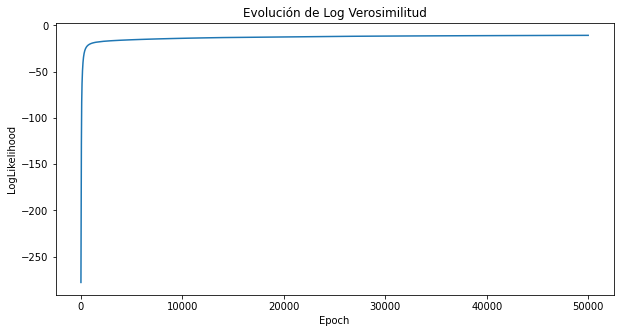

In [16]:
plt.figure(figsize = (10, 5))
plt.plot(target_fn_value)
plt.xlabel('Epoch')
plt.ylabel('LogLikelihood')
plt.title('Evolución de Log Verosimilitud')
plt.show()

# Paso 4. Visualización del Modelo

Hasta este punto se encontró cuál es el vector $\hat{\beta}$ tal que $$\hat{\beta} = \operatorname{arg}\operatorname{min}_{\beta} \ell(\beta).$$

Con lo anterior se puede visualizar la frontera de predicción del modelo.

Partiendo de que el modelo es, 

$$P(y_i = 1 | X; \beta) = \Lambda(\beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i})$$

Se puede mostrar que la frontera de decisión para $P(y_i = 1 | X; \beta) = 0.5$, viene dada por, 

$$X_2 = \frac{-\beta_0 - \beta_1 X_1}{\beta_2}.$$


A continuación programe la función que permita visualizar la frontera de predicción en los datos:

In [19]:
lin_space = np.linspace(-2, 5) # Corresponde a los puntos sobre el dominio de la función
# Se calculará los puntos sobre la frontera en lin_space y luego se trazará la línea que los une. 

def frontera_prediccion(beta, lin_space):
  """
  Permite calcular la ecuación de la recta que separa las dos clases (por probabilidad). 

  beta:
    Vector de Coeficientes estimados (K x 1)
  """

  ###

  beta_0 = beta_j[0]
  beta_1 = beta_j[1]
  beta_2 = beta_j[2]

  frontera = -(beta_0 - beta_1*lin_space)/(beta_2)

  ###
  return frontera

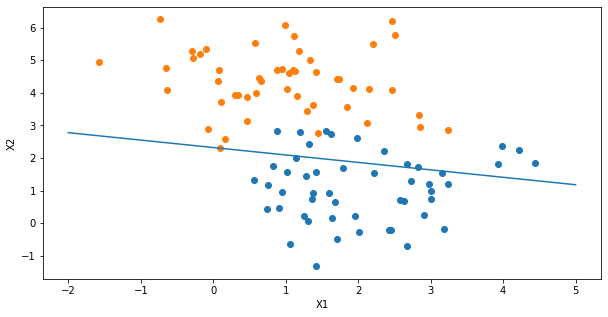

In [20]:
# Se generan nuevamente los datos
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                  random_state=0)
plt.figure(figsize = (10, 5))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1])
plt.plot(lin_space, frontera_prediccion(beta_j, lin_space))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Comparación con Librería (Opcional)

Para estar seguros que la implementación quedó bien hecha, se recomienda comparar con el modelo implementado en alguna librería. Para este caso, se sugiere el uso del estimador [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [21]:
from sklearn.linear_model import LogisticRegression

El estimador de Regresión Logística de Sci-Kit Learn incluye por defecto la regularización de los coeficientes. Por lo tanto, si no se "desactiva" no van a tener los mismos resultados. 

In [22]:
### Use el Estimador LogisticRegression para ajustar los datos 
clf = LogisticRegression(random_state=0, penalty = 'none').fit(X, y)

###

In [23]:
beta_coef_lr = np.hstack([clf.intercept_.reshape(-1, 1), clf.coef_]).T

In [24]:
print(beta_coef_lr.T)

[[13.22096272  0.59017069 -5.18802079]]


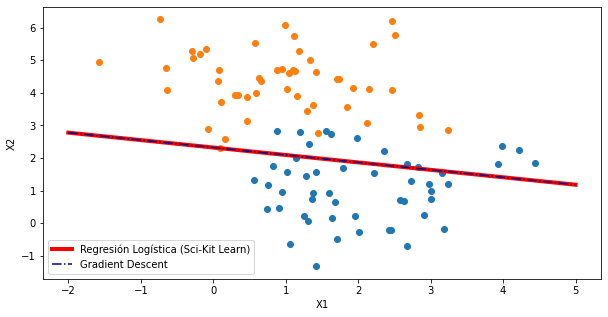

In [48]:
plt.figure(figsize = (10, 5))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1])
plt.plot(lin_space, frontera_prediccion(beta_coef_lr, lin_space), color = 'red', label = 'Regresión Logística (Sci-Kit Learn)', linestyle='solid', linewidth=4)
plt.plot(lin_space, frontera_prediccion(beta_j, lin_space), color = 'darkblue', label = 'Gradient Descent',linestyle='dashdot')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()